Importing handy libraries

In [126]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


Getting and visualizing our dataset

In [127]:
df_train = pd.read_csv("data/train.csv")

df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [128]:
# saving df to excel file for soft data thinkering

# df_train.to_excel('df_train.xlsx', index='False')
# print("df saved to excel")

# 1 - Data exploration

Getting a sense of our target dependant variable

In [129]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

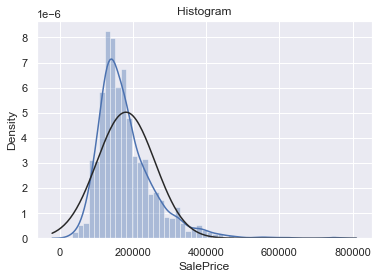

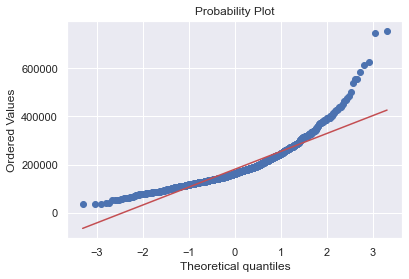

In [130]:
#histogram and normal probability plot
plt.title('Histogram')
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()

#with plot = plt, we can generate a fitting line against the quantiles of the normal distribution
res = stats.probplot(df_train['SalePrice'], plot=plt)

We can see that the skewness is positive (long tail with bigger values than mean), with high kurtosis (rapid declining of the curve around the mean)

In [131]:
print('Skewness: {:.2f}'.format(df_train['SalePrice'].skew()),
      '\nkurtosis: {:.2f}'.format(df_train['SalePrice'].kurt()))


Skewness: 1.88 
kurtosis: 6.54


With a correlation matrix, we can see what are the most correlated variables to the target SalePrice

<AxesSubplot:>

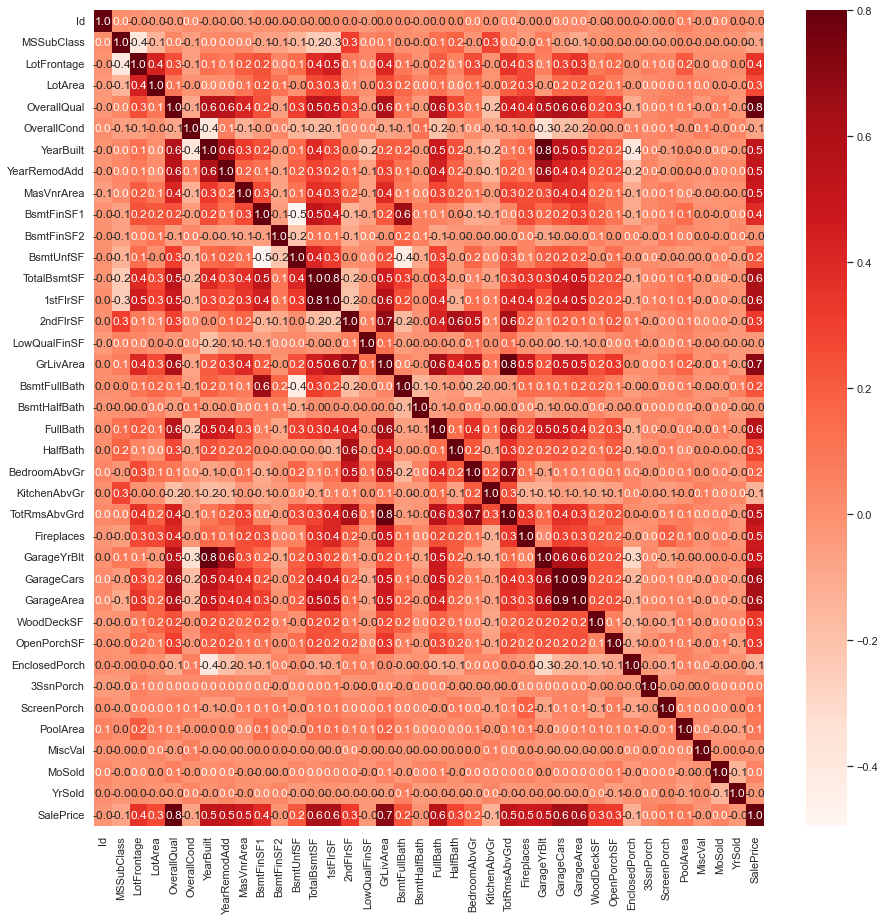

In [132]:
sns.set()
plt.figure(figsize=(15, 15))
sns.heatmap(data=df_train.corr(), annot=True, fmt='.1f', vmax=0.8, 
            cmap=plt.cm.Reds)


As we can see, the variables GarageCars and GarageArea reprsent the issue of multicollinearity, highly correlated even tho they are independant in theory. This issue is also seen between 'TotalBsmtSF' and '1stFlrSF' variables.

Lets take a look at the top 4 most relevant variables: OverallQual, YearBuilt, TotalBsmtSF and GrLivArea => high correlation with our target

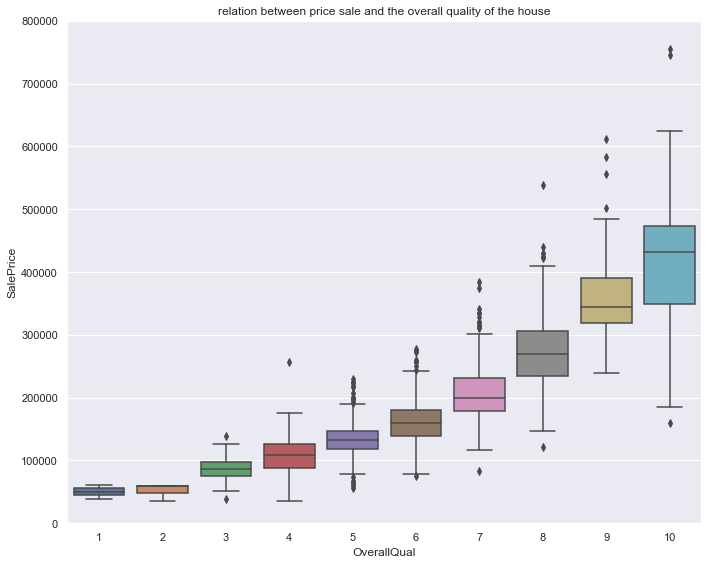

In [133]:
# Overall quality of the house seens to be impactfull, the better the costier

fig, axis = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice'])
fig.axis(ymin=0, ymax=800000)
axis.title.set_text('relation between price sale and the overall quality of the house')
plt.tight_layout()
plt.show()

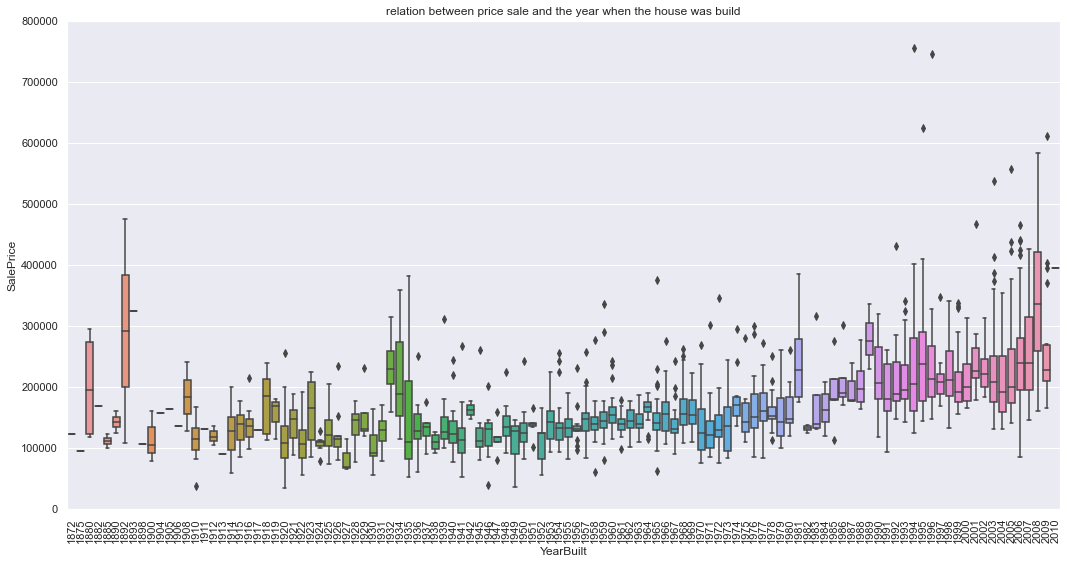

In [134]:
# YearBuilt seens to be  slightly impactfull, the more recently built the higher the price
# We are not considering inflation.

fig, axis = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df_train['YearBuilt'], y=df_train['SalePrice'])
fig.axis(ymin=0, ymax=800000)
axis.title.set_text('relation between price sale and the year when the house was build')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

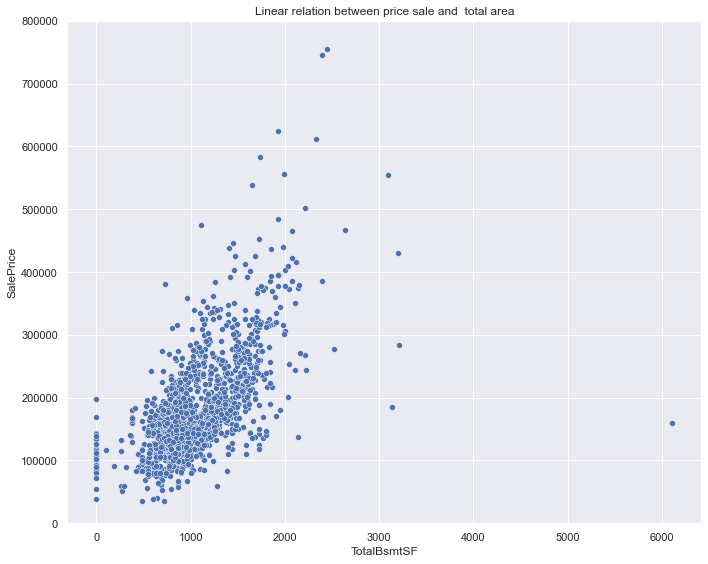

In [135]:
# TotalBsmtSF seens to be impactfull, the more square meters  the higher the price

fig, axis = plt.subplots(figsize=(10, 8))
fig = sns.scatterplot(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'])
fig.axis(ymin=0, ymax=800000)
axis.title.set_text('Linear relation between price sale and  total area')
plt.tight_layout()
plt.show()

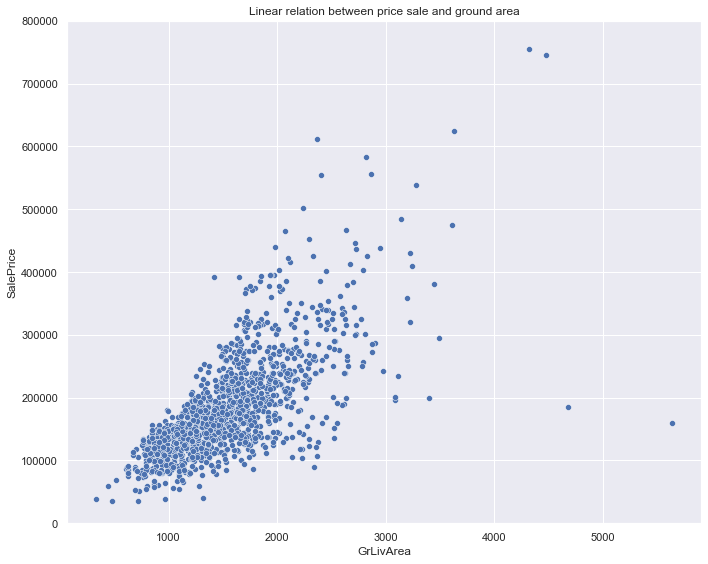

In [136]:
# GrLivArea seens to be impactfull, the more square meters in the ground where the house belongs,  the higher the price
fig, axis = plt.subplots(figsize=(10, 8))
fig = sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
#plt.title('Linear relation between price sale and ground area')
fig.axis(ymin=0, ymax=800000)
axis.title.set_text('Linear relation between price sale and ground area')
plt.tight_layout()
plt.show()

Testing a variable that people usually expects to be highly correlated with the house pricing: Location/ neighborhood

As we can see, thats not the case, as in the heat map, the correlation is about only 20%. With the boxplot below, we cant see a pattern that clearly indicate that certain neighborhood have high cost houses or low cost houses.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

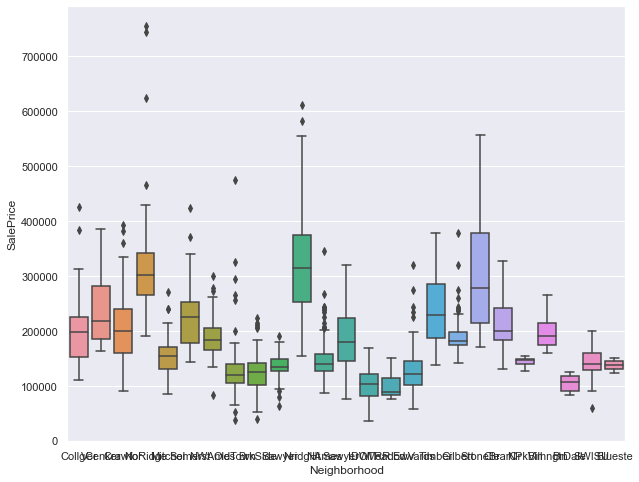

In [137]:
# As we can see, the prices of each area are widely ranged, 
# so it is not good for correlation and we will keep our 4 most relevant data

plt.figure(figsize=(10,8))
sns.boxplot(x=df_train['Neighborhood'], y=df_train['SalePrice'])

Now, we should take in account other relevants variable shown in the heatmap, so now we gonna get a heatmap with the 10 variables with the most high corr with 'SalePrice'

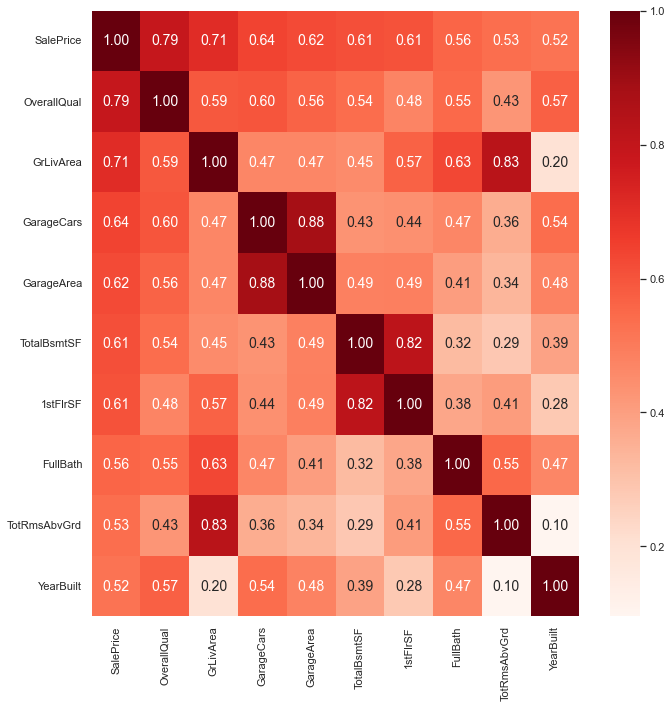

In [138]:
# Top 10 variables corr with saleprice

k = 10
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index # cols names of the top10 values
top_features_matrix = df_train.corr().nlargest(k, 'SalePrice') # top 10 rows with all columns
top_features_matrix = df_train.corr()[cols].nlargest(k, 'SalePrice') # top 10 rows with top 10 cols
top_features = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'] # series with top 10 highest values

plt.figure(figsize=(10, 10))
sns.heatmap(data=top_features_matrix, annot=True, fmt='.2f', square=False, cmap=plt.cm.Reds, annot_kws={'size': 14},
           yticklabels=cols.values, xticklabels=cols.values, vmax=1)
plt.tight_layout()
plt.show()


We gonna keep the already analised: 'OverallQual', 'GrLivArea' and 'TotalBsmtSF'

FullBath

YearBuilt

Also, GarageCars from the GarageCars and garageArea, as they both give same info, and the latter give less corr with our target

Also, TotalBsmtSF from the TotalBsmtSF and 1stFloor, as they both give same info, and the latter give less corr with our target 

Also, GrLivArea from the GrLivArea and TotRmsAbvGrd, as they both give same info, and the latter give less corr with our target 



## Lets see the relations between all these features with scatterplots

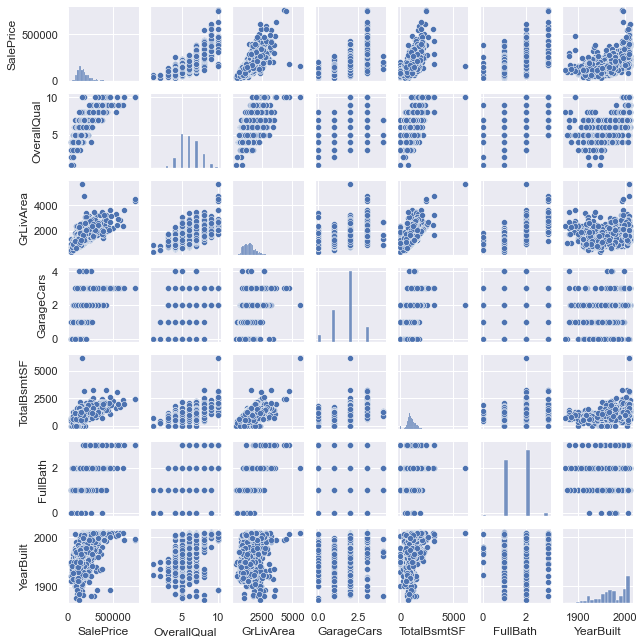

In [139]:
# so now, lets take a look on all scatter plots from these choosen cols
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(df_train[cols], size=1.3)
plt.show()


From this plot, we can see that Overallquality really increases with the quality of the house,e.g, the more space in the basement (TotalBsmtSF ), the better

Also, saleprice seens to increase exponentially as the yearbuilt become more recently

## Next step

Now,  the next step is to pre-process this data so it can be useful and eficient when using against a supervisioned regression model.

Supervisioned because we have acess to data with label (target y), and regression model because our target data is continuous in time.

In [140]:
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt']

### Handling missing data

To deal with missing data, be with droping their rows, or seting to zero for example, we need to do a little investigation to avoid bias or unnecessary reduction of our sample.

In [141]:
total = df_train.isnull().sum().sort_values(ascending=False) # sum the  null entrys per column (True quantity)
                                                                
percentage = (total*100/len(df_train)).round(2)


missing = pd.concat([total, percentage], axis=1, keys=['total', 'percentage %']).head(20)

missing

,total,percentage %
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


It is good pratice to delete variables that are missing more than 15% of their entrys, so we will not use these columns. As we can see, these variables are not in the list of our 10 most impactfull variables anyway, so we arent lose solid information.

As we can also see, Garage variable in this list represent the same missing data, and our main garage variable is 'GarageCars', so we can with no problem delete these too.
We can do the same with Bsmt variables

'Mas' variables have some null, and have strong correlation with 'OveralQuality' that we already consider, we can delete those.

'Eletrical' seens to be very idenpendant, and with only 1 null value, so we are goona keep.

In [142]:
# deleting the variables that do not matter or have too much nulls:
df_train = df_train.drop(labels=missing[missing['total'] > 1].index, axis=1)

# treating the nulls of variables not deleted:
df_train =  df_train.drop(labels=df_train.loc[df_train['Electrical'].isnull()].index, axis=0)

# See if we got everything Right ( zero data missing)

df_train.isnull().sum().max()

0

## Handling Outliers

This analisys involve standard deviation. 
First, we gonna standardize the data with univariation, so all gonna have max standard deviation of 1 and mean of 0.

StandardScaler() function  works on removing the mean and the standard deviation of the set, although they are stored for later use.   

Explanation of why by Sckit-learn:

Many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

We need first to define a numerical limit that classifys our observations values as an outliar

In [143]:
# fiting to zero mean and -1 to 1 std the 'SalePrice', we use np.newaxis to increase the dimensions of the array
# as its a requirement for this function fit_transform
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])

saleprice_scaled[0:10]



array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       [-0.5152254 ],
       [ 0.86943738],
       [-0.47746187],
       [ 1.58694445],
       [ 0.2400452 ],
       [-0.64236262],
       [-0.79215796]])

In [144]:

# # A função argsort retorna um array com os indices dos elementos de outro array,
# # como se o outro array tivesse sido ordenado do menor para o maior número.

# # we use the array as index because we need only the one row dimension

# # bottom outliers
# low_range = saleprice_scaled[saleprice_scaled[:,0] # values of the first column only
#                              .argsort()][:10] #sorted index of these values, first 10
#  # upper outliers
# high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
# print('outer range (low) of the distribution:')
# print(low_range)
# print('\nouter range (high) of the distribution:')
# print(high_range)

In [145]:
# same function, in simplifyed way:

upper_outliers = np.sort(saleprice_scaled[:, 0])[-10:]
bottom_outliers = np.sort(saleprice_scaled[:, 0])[:10]

print('outer range (low) of the distribution:')
print(bottom_outliers)

print('\nouter range (high) of the distribution:')
print(upper_outliers)


outer range (low) of the distribution:
[-1.83820775 -1.83303414 -1.80044422 -1.78282123 -1.77400974 -1.62295562
 -1.6166617  -1.58519209 -1.58519209 -1.57269236]

outer range (high) of the distribution:
[3.82758058 4.0395221  4.49473628 4.70872962 4.728631   5.06034585
 5.42191907 5.58987866 7.10041987 7.22629831]


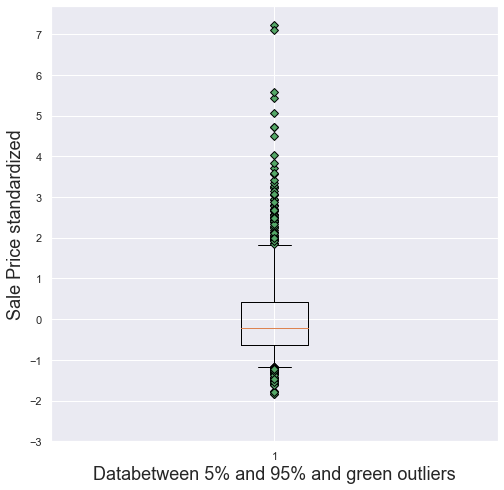

In [146]:

plt.figure(figsize=(8,8))
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(x=saleprice_scaled, flierprops=green_diamond, whis=[5, 95])
plt.xlabel('Databetween 5% and 95% and green outliers',fontsize=18)
plt.yticks(np.arange(-3,8))
plt.ylabel('Sale Price standardized',fontsize=18)

plt.show()

We gonna consider these values as not our outliers, looking closely at that 7 value. Bottom values are not that bad though.
With the boxplot, we can see that 50% of all the data are between -1 and 1, and there are few outliers represented in green.

To indeep take care of outliers, we gonna analise the most impactful features as they are gonna be most impactful in training our model, with bivariate analysis.

By our megascatterplot, we can see two possibles features that have atleast 1 outlier, so we can think of deleting manually the outliers points: 'GrLivArea' and 'TotalBsmtSF'

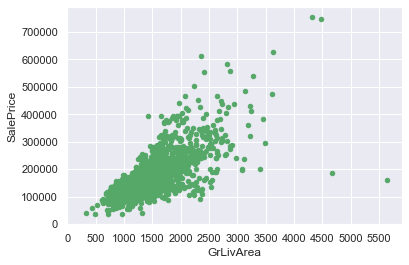

In [147]:
#GrLivArea

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', c='g', xticks=(np.arange(0, 6000, 500)) )
plt.show()

As we can see, there are 2 outliers that we can speculate to be a big area in the country for instance, and do not represent our data well, so we gonna delete these.

In [148]:
# two biggest values:
indexes = df_train.sort_values(by='GrLivArea')[-2:].index # the 2 last values 
indexes


Int64Index([523, 1298], dtype='int64')

In [149]:
df_train = df_train.drop(labels=indexes, axis=0) #dropping by index

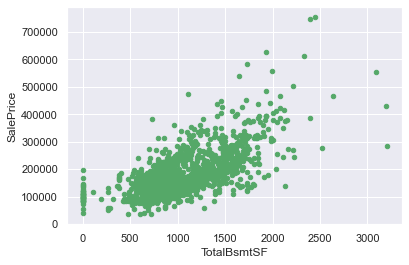

In [150]:
#GrLivArea

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', c='g')
plt.show()

Althoug a bit off, these points are all following the trend, so we gonna keep it.

# Adjusting our target data

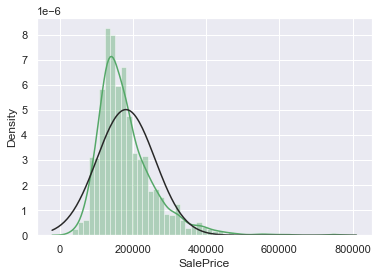

In [151]:
 # As we know, this is what our target looks like:
    
sns.distplot(df_train['SalePrice'], fit=norm, color='g')

plt.show()

For best fitting in our future model, data optimal distribution is the Normal. However, we can see by the histogram Skew and the Probabilityplot (Who isnt following a linear diagonal line entirely) that it is not the case. To adress this , we have to do some transformation in the data.

In statistical books, we can see that for positive skew, logtransformation its enough:

"For positively skewed distributions, the most popular transformation is the log transformation. The log transformation implies the calculations of the natural logarithm for each value in the dataset. The method reduces the skew of a distribution."

For aditional knowledge, to deal with negative skewness, wi applyes the inverse functions that we use for positive skew. We could also use sqaure root, or inverse foir example.

In [152]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

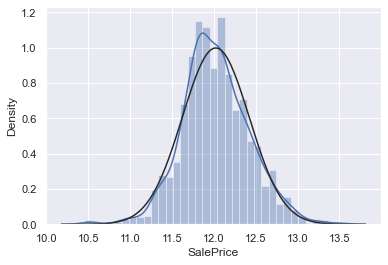

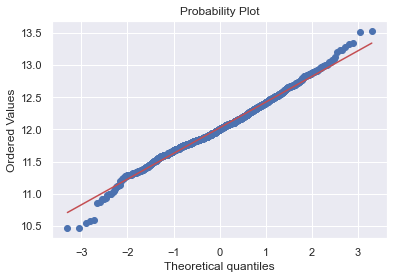

In [153]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Much better!

We can take a look in top impactful variable as well: [
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt']
 
 It does not make sense to look at categorical variables in this way, so we gonna take a look only on: 'GrLivArea','TotalBsmtSF'

Its already good!

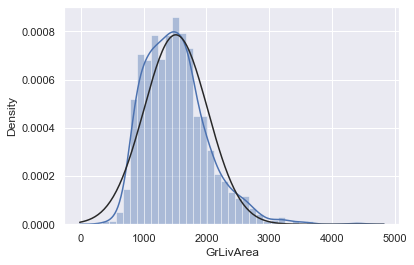

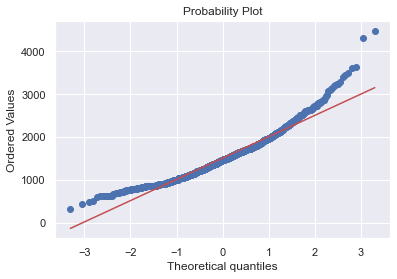

In [154]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

A bit of positive skewed, so we apply log again

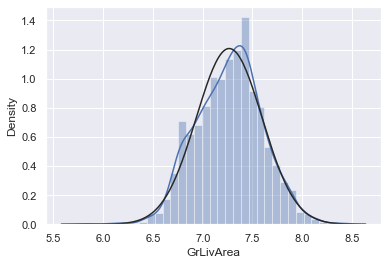

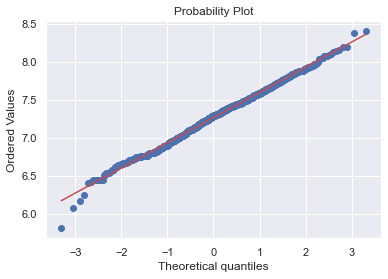

In [155]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'] )
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Nice! testing next:

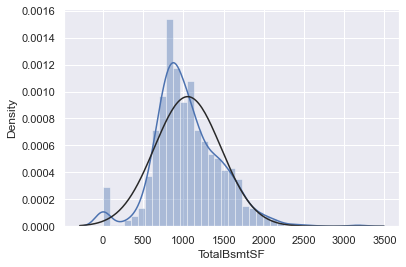

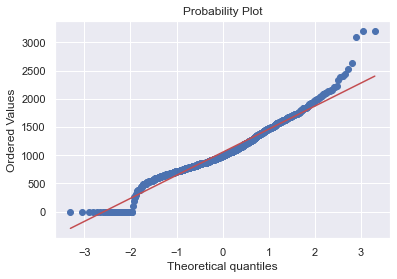

In [156]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

It has skewness, but we cant apply log here, because we have zeros, so we gonna apply log only on non zeros values first, then get back the zeros.

In [157]:
# where condition , everything thats different than zero will remain the same, other will be nan (all zeros)
df_train['TotalBsmtSF'] = df_train['TotalBsmtSF'].where(df_train['TotalBsmtSF']>0, other=np.nan )

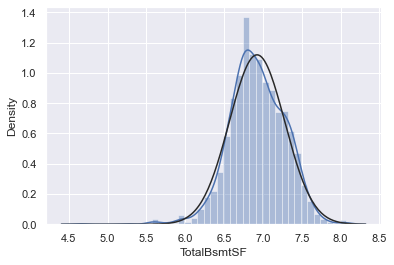

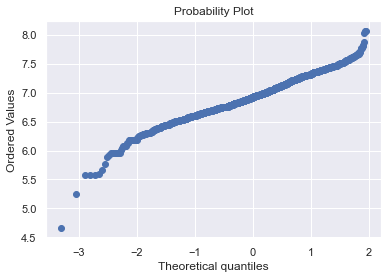

In [158]:
df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [159]:
# getting the zeros back
df_train[df_train['TotalBsmtSF'].isna()]['TotalBsmtSF'] = 0 #  [when met condition nan ] column values = will be zero
df_train['TotalBsmtSF'].value_counts()

6.761573    35
6.510258    17
6.815640    15
6.946976    14
6.704414    13
            ..
6.483107     1
7.516433     1
7.365813     1
6.561031     1
7.340836     1
Name: TotalBsmtSF, Length: 718, dtype: int64

now, lets test if we get a better variance between our transformed data and target

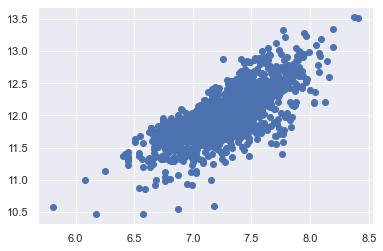

In [160]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

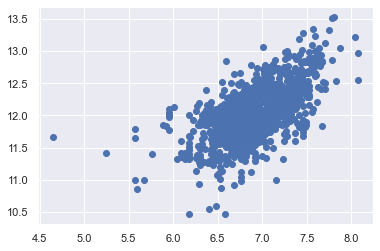

In [161]:
# only for non zeros values here.
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can see that our data has better variance, wich can be decisive when training a model.  For this, we call homeoscidacisty

Finally, we gonna create columns for our categorical data, in the most classic mode: one column for each category, with zero or one (has or not that category)

In [164]:
df_train = pd.get_dummies(df_train)
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


## Conclusion of data enginnering

These methods were based in good pratice by Hair et al. (2013) and was  a pratical exercise based on Kaggle competition notebook by Pedro Marcelino, regarding House predictor competition (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)


Now, its time to run appropriated models for the ultimate results on predicting the prices!
